In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
human_data = pd.read_table('human_data.txt')
human_data.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


In [3]:
human_data['class'].unique()

array([4, 3, 5, 2, 6, 0, 1], dtype=int64)

In [4]:
# chimp_data = pd.read_table('chimp_data.txt')
# dog_data = pd.read_table('dog_data.txt')
# chimp_data.head()
# dog_data.head()

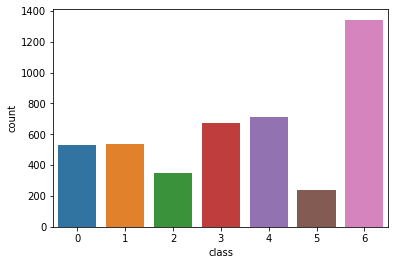

In [5]:
# Checking for a Balanced Dataset
sns.countplot(human_data['class'])

We can consider it as a balanced dataset

### Feature Engineering

*According to DNA Sequenceing we need to convert it to vectors of equal length*

In [6]:
# function to convert sequence strings into k-mer words, default size = 6 (hexamer words)
def getKmers(sequence, size=6):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]


In [7]:
# for x in range(len(human_data)):
#     human_data['word'] = human_data.apply(to_seq(human_data['sequence']))

In [8]:
human_data['words'] = human_data.apply(lambda x: getKmers(x['sequence']), axis=1)
human_data = human_data.drop('sequence', axis=1)

In [9]:
human_data.head()

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."


In [11]:
# Now to converst the list items to type string
human_text = list(human_data['words'])

In [12]:
for i in range(len(human_text)):
    human_text[i] = " ".join(human_text[i])

In [13]:
human_text[1]

'atgaac tgaacg gaacga aacgaa acgaaa cgaaaa gaaaat aaaatc aaatct aatctg atctgt tctgtt ctgttc tgttcg gttcgc ttcgct tcgctt cgcttc gcttca cttcat ttcatt tcattc cattca attcat ttcatt tcattg cattgc attgcc ttgccc tgcccc gccccc ccccca ccccac cccaca ccacaa cacaat acaatc caatcc aatcct atccta tcctag cctagg ctaggc taggcc aggcct ggccta gcctac cctacc ctaccc tacccg acccgc cccgcc ccgccg cgccgc gccgca ccgcag cgcagt gcagta cagtac agtact gtactg tactga actgat ctgatc tgatca gatcat atcatt tcattc cattct attcta ttctat tctatt ctattt tatttc atttcc tttccc ttcccc tccccc ccccct cccctc ccctct cctcta ctctat tctatt ctattg tattga attgat ttgatc tgatcc gatccc atcccc tcccca ccccac cccacc ccacct cacctc acctcc cctcca ctccaa tccaaa ccaaat caaata aaatat aatatc atatct tatctc atctca tctcat ctcatc tcatca catcaa atcaac tcaaca caacaa aacaac acaacc caaccg aaccga accgac ccgact cgacta gactaa actaat ctaatc taatca aatcac atcacc tcacca caccac accacc ccaccc caccca acccaa cccaac ccaaca caacaa aacaat acaatg caatga aatgac atgact tgacta gacta

In [28]:
y = human_data['class']

In [29]:
y.shape

(4380,)

### Now we will apply the BAG of WORDS using CountVectorizer using NLP

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
X = cv.fit_transform(human_text)

In [33]:
X.shape

(4380, 232414)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
print(X_train.shape)
print(X_test.shape)

(3504, 232414)
(876, 232414)


### Multinomial Naive Bayes Classifier

In [36]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [ ]:
y_pred = classifi